In [14]:
"""""
Data Preprocessing and EDA
Start Date: April 9, 2024
Finish Date: April 12, 2024

Co-authors: Natalie Hammel and Ananya Shah
"""

# Import packages
import pandas as pd
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [17]:
IMG_PATH = '/Users/nataliehammel/Downloads/fashion-dataset/images/'
IMGCSV_PATH = '/Users/nataliehammel/Downloads/fashion-dataset/images.csv'
STYLECSV_PATH = '/Users/nataliehammel/Downloads/fashion-dataset/styles.csv'

In [4]:
def get_filenames(directory):

        filenames = {entry.name for entry in os.scandir(directory) if entry.is_file()}

        return filenames

def image_exists(image_filename):

        global images

        if image_filename in images:
           return image_filename
        else:
            return np.nan

def data_setup():

    "Load, preprocess datasets for utilization"

    styles_df = pd.read_csv(STYLECSV_PATH, on_bad_lines='skip')
    img_df = pd.read_csv(IMGCSV_PATH)

    return styles_df, img_df

In [5]:
styles_df, img_df = data_setup()
images = get_filenames(IMG_PATH)
styles_df['image'] = styles_df["id"].apply(lambda image: image_exists(str(image) + ".jpg"))
styles_df = styles_df.dropna(subset=['image'])
styles_df = styles_df.reset_index(drop=True)

In [20]:
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg


In [7]:
img_df.head()

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


In [15]:
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img,display=False):
    if display :
        return IMG_PATH + img
    else :
        return IMG_PATH +img

def load_image(img,display=False):
    return cv2.imread(img_path(img,display))

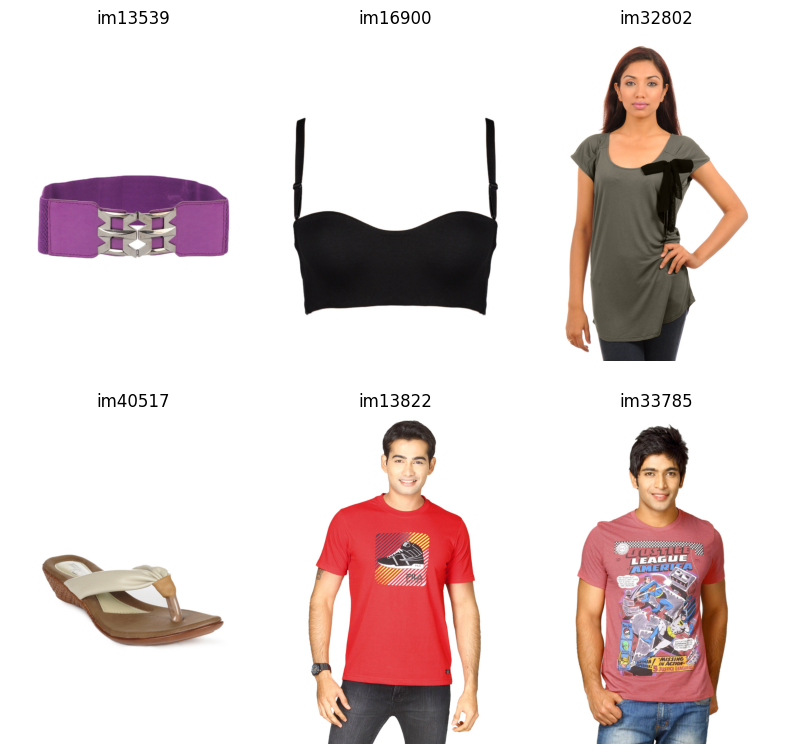

In [18]:
# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image,True) for i, row in styles_df.sample(6).iterrows()}
plot_figures(figures, 2, 3)